<a href="https://colab.research.google.com/github/chakradhar915/Chakradhar_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import pandas_datareader as pdr
import yfinance as yf

# For time stamps
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ["AMZN", "DPZ", "BTC", "NFLX"]

# Set up End and Start times for data grab
tech_list = ["AMZN", "DPZ", "BTC", "NFLX"]

start = dt.datetime(2013,5,1)
end = dt.datetime(2019,5,14)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC: Data doesn't exist for startDate = 1367366400, endDate = 1557792000
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AMZN, DPZ, BTC, NFLX]
company_name = ["AMZN", "DPZ", "BTC", "NFLX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

df
#tried to import the data by using the pandas data reader to check wheather the 
#given csv file contains the close values of each company

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2013-05-01,253.899994,254.199997,245.750000,248.229996,248.229996,4391400.0,AMZN
2013-05-02,248.940002,252.929993,245.779999,252.550003,252.550003,3936200.0,AMZN
2013-05-03,256.140015,259.250000,254.699997,258.049988,258.049988,3514000.0,AMZN
2013-05-06,258.089996,259.500000,253.419998,255.720001,255.720001,2347800.0,AMZN
2013-05-07,256.309998,259.739990,252.910004,257.730011,257.730011,3133700.0,AMZN
...,...,...,...,...,...,...,...
2019-05-07,377.000000,379.910004,365.809998,370.459991,370.459991,6974900.0,NFLX
2019-05-08,367.920013,369.000000,361.359985,364.369995,364.369995,6572000.0,NFLX
2019-05-09,360.899994,364.200012,352.750000,362.750000,362.750000,5882600.0,NFLX


In [324]:
df_stockdata = pd.read_csv("portfolio_data.csv")
df_stockdata

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [325]:
#no null values as of now
df_stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [326]:
df_stockdata.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

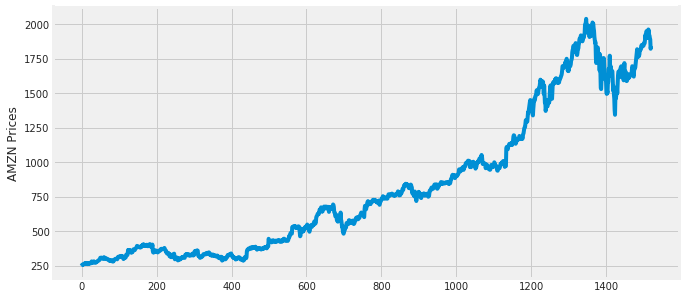

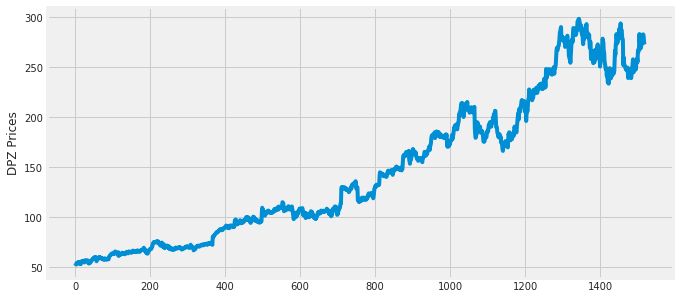

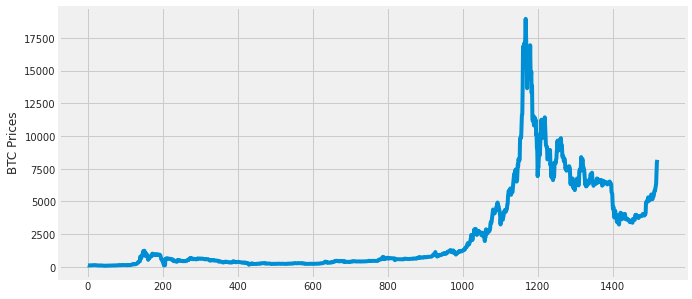

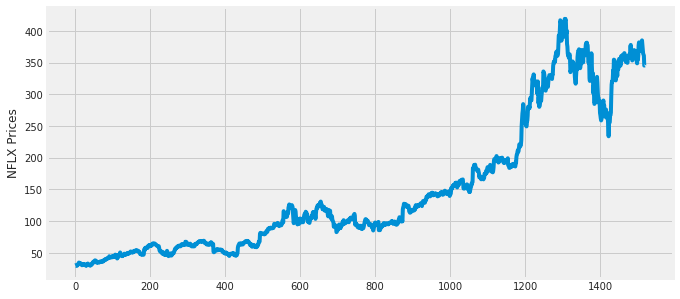

In [327]:
#taking only close values of stoke in different dataframes
Df_AMZN = df_stockdata[['AMZN']] 
Df_DPZ = df_stockdata[['DPZ']] 
Df_BTC = df_stockdata[['BTC']]
Df_NFLX = df_stockdata[['NFLX']] 



# Plot the closing price of GLD 
Df_AMZN.AMZN.plot(figsize=(10,5))
plt.ylabel("AMZN Prices")
plt.show()
Df_DPZ.DPZ.plot(figsize=(10,5))
plt.ylabel("DPZ Prices")
plt.show()
Df_BTC.BTC.plot(figsize=(10,5))
plt.ylabel("BTC Prices")
plt.show()
Df_NFLX.NFLX.plot(figsize=(10,5)) 
plt.ylabel("NFLX Prices")
plt.show()


In [328]:
#taking the exploratory average of 2 and 6 data
Df_AMZN['S_2'] = Df_AMZN['AMZN'].shift(1).rolling(window=2).mean() 
Df_AMZN['S_6']= Df_AMZN['AMZN'].shift(1).rolling(window=6).mean() 
Df_DPZ['S_2'] = Df_DPZ['DPZ'].shift(1).rolling(window=2).mean() 
Df_DPZ['S_6']= Df_DPZ['DPZ'].shift(1).rolling(window=6).mean() 
Df_BTC['S_2'] = Df_BTC['BTC'].shift(1).rolling(window=2).mean() 
Df_BTC['S_6']= Df_BTC['BTC'].shift(1).rolling(window=6).mean() 
Df_NFLX['S_2'] = Df_NFLX['NFLX'].shift(1).rolling(window=2).mean() 
Df_NFLX['S_6']= Df_NFLX['NFLX'].shift(1).rolling(window=6).mean() 

#droping the null values 
Df_AMZN= Df_AMZN.dropna()
Df_DPZ= Df_DPZ.dropna()
Df_BTC= Df_BTC.dropna()
Df_NFLX= Df_NFLX.dropna()

#assigning the s_2 and s_6 for x variables
X_AMZN = Df_AMZN[['S_2','S_6']] 
X_DPZ = Df_DPZ[['S_2','S_6']] 
X_BTC = Df_BTC[['S_2','S_6']] 
X_NFLX = Df_NFLX[['S_2','S_6']] 

print(X_AMZN.head())
print(X_DPZ.head())
print(X_BTC.head())
print(X_NFLX.head())


           S_2         S_6
6   258.205002  255.159999
7   259.419998  257.148333
8   261.895004  258.995000
9   264.070007  260.071671
10  266.419998  262.173335
          S_2        S_6
6   54.268616  52.894530
7   54.203034  53.366089
8   54.188980  53.761139
9   54.465358  54.115591
10  54.924427  54.460674
           S_2         S_6
6   113.000000  108.808333
7   115.250000  110.716666
8   116.669998  113.639999
9   113.520001  113.389999
10  112.810001  114.160000
          S_2        S_6
6   29.632857  30.152381
7   30.358571  30.235714
8   31.007143  30.311905
9   31.933571  30.691190
10  33.096428  31.245476


In [329]:
#taking the close values of stock values
y_AMZN = Df_AMZN['AMZN']
y_DPZ = Df_DPZ['DPZ']
y_BTC = Df_BTC['BTC']
y_NFLX = Df_NFLX['NFLX']


In [330]:
#printing the y variables
print(y_AMZN.head())
print(y_DPZ.head())
print(y_BTC.head())
print(y_NFLX.head())

6     260.160004
7     263.630005
8     264.510010
9     268.329987
10    266.559998
Name: AMZN, dtype: float64
6     54.020340
7     54.357620
8     54.573097
9     55.275757
10    54.001606
Name: DPZ, dtype: float64
6     117.699997
7     115.639999
8     111.400002
9     114.220001
10    118.209999
Name: BTC, dtype: float64
6     30.915714
7     31.098572
8     32.768570
9     33.424286
10    34.771427
Name: NFLX, dtype: float64


In [331]:
#spliting the data in to xtrain,xtest,ytrain,ytest
t=.8 
t = int(t*len(Df_AMZN)) 
# Train dataset 
X_train_AMZN = X_AMZN[:t] 
y_train_AMZN = y_AMZN[:t]  
# Test dataset 
X_test_AMZN = X_AMZN[t:] 
y_test_AMZN = y_AMZN[t:]

X_train_DPZ = X_DPZ[:t] 
y_train_DPZ = y_DPZ[:t]  
# Test dataset 
X_test_DPZ = X_DPZ[t:] 
y_test_DPZ = y_DPZ[t:]

X_train_BTC = X_BTC[:t] 
y_train_BTC = y_BTC[:t]  
# Test dataset 
X_test_BTC = X_BTC[t:] 
y_test_BTC = y_BTC[t:]

X_train_NFLX = X_NFLX[:t] 
y_train_NFLX = y_NFLX[:t]  
# Test dataset 
X_test_NFLX = X_NFLX[t:] 
y_test_NFLX = y_NFLX[t:]


In [332]:
from sklearn.linear_model import LinearRegression
#fitting the regression model
linear_AMZN = LinearRegression().fit(X_train_AMZN,y_train_AMZN)
linear_DPZ = LinearRegression().fit(X_train_DPZ,y_train_DPZ)
linear_BTC = LinearRegression().fit(X_train_BTC,y_train_BTC)
linear_NFLX = LinearRegression().fit(X_train_NFLX,y_train_NFLX)

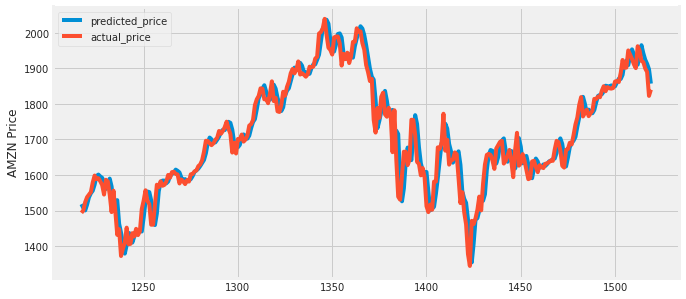

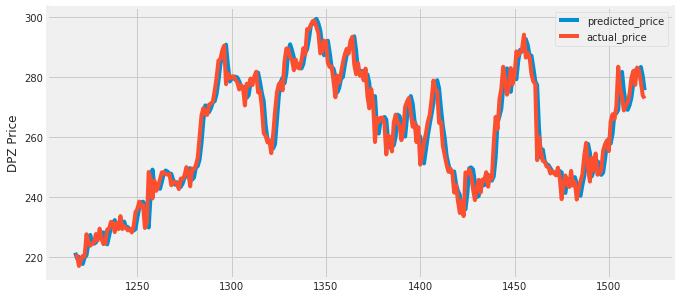

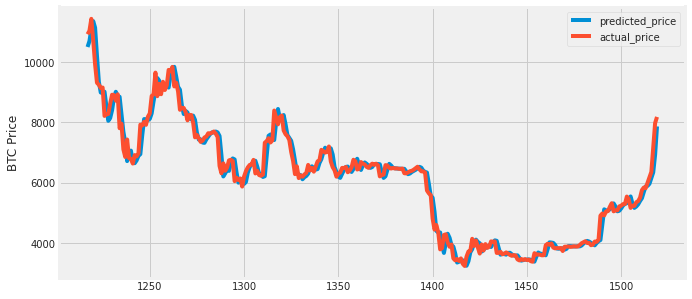

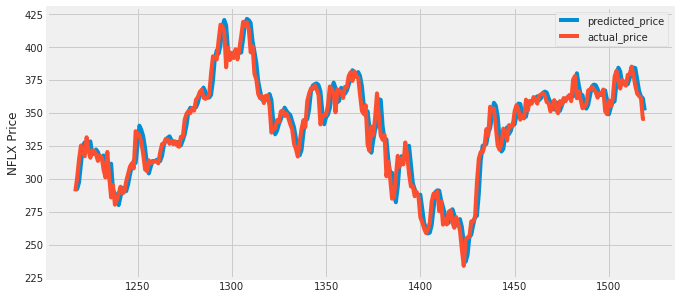

In [333]:
#predicting the model1
predicted_price_AMZN = linear_AMZN.predict(X_test_AMZN)
predicted_price_DPZ = linear_DPZ.predict(X_test_DPZ)
predicted_price_BTC = linear_BTC.predict(X_test_BTC)  
predicted_price_NFLX = linear_NFLX.predict(X_test_NFLX)

#ploting the values of  predicted_price and actual_price
predicted_price_AMZN = pd.DataFrame(predicted_price_AMZN,index=y_test_AMZN.index,columns = ['price'])
predicted_price_AMZN.plot(figsize=(10,5)) 
y_test_AMZN.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AMZN Price")  
plt.show()

predicted_price_DPZ = pd.DataFrame(predicted_price_DPZ,index=y_test_DPZ.index,columns = ['price']) 
predicted_price_DPZ.plot(figsize=(10,5)) 
y_test_DPZ.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("DPZ Price") 
plt.show()

predicted_price_BTC = pd.DataFrame(predicted_price_BTC,index=y_test_BTC.index,columns = ['price']) 
predicted_price_BTC.plot(figsize=(10,5)) 
y_test_BTC.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("BTC Price") 
plt.show()

predicted_price_NFLX = pd.DataFrame(predicted_price_NFLX,index=y_test_NFLX.index,columns = ['price']) 
predicted_price_NFLX.plot(figsize=(10,5)) 
y_test_NFLX.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("NFLX Price") 
plt.show()


In [334]:
#creating the new data frame with the pridicted and actual values
df_amazon=pd.DataFrame()
df_amazon['actual values'] = y_test_AMZN
df_amazon['predicted values'] = predicted_price_AMZN
df_amazon

,actual values,predicted values
1217,1493.449951,1517.860893
1218,1500.250000,1507.333888
1219,1523.609985,1500.254743
1220,1537.640015,1516.631337
1221,1545.000000,1537.186170
...,...,...
1515,1917.770020,1942.610874
1516,1899.869995,1924.497291
1517,1889.979980,1912.932993
1518,1822.680054,1897.640388


In [335]:
#creating the new data frame with the pridicted and actual values
df_DPZ=pd.DataFrame()
df_DPZ['actual values'] = y_test_DPZ
df_DPZ['predicted values'] = predicted_price_DPZ
df_DPZ

,actual values,predicted values
1217,220.331161,221.552390
1218,220.608047,219.644853
1219,217.157013,220.175739
1220,218.966568,218.576324
1221,220.469604,217.806466
...,...,...
1515,283.149994,280.581150
1516,282.160004,280.851062
1517,278.369995,283.352007
1518,273.880005,280.370984


In [336]:
#creating the new data frame with the pridicted and actual values
df_BTC=pd.DataFrame()
df_BTC['actual values'] = y_test_BTC
df_BTC['predicted values'] = predicted_price_BTC
df_BTC

,actual values,predicted values
1217,10929.370120,10506.530336
1218,11043.120120,10699.976280
1219,11440.730470,11097.949692
1220,10735.450200,11365.978642
1221,9928.559570,11149.125802
...,...,...
1515,6171.959961,5964.594551
1516,6358.290039,6153.549680
1517,7191.359863,6343.548608
1518,7980.129883,6929.371018


In [337]:
#creating the new data frame with the pridicted and actual values
Df_NFLX=pd.DataFrame()
Df_NFLX['actual values'] = y_test_NFLX
Df_NFLX['predicted values'] = predicted_price_NFLX
Df_NFLX

,actual values,predicted values
1217,290.390015,292.705026
1218,301.049988,292.224266
1219,315.000000,297.299351
1220,325.220001,311.297333
1221,321.160004,324.952184
...,...,...
1515,364.369995,375.046706
1516,362.750000,366.516173
1517,361.040009,362.388093
1518,345.260010,361.015338


In [341]:
#calculating the all the r2 values for the all the stocks value near to 100 is good
r2_score_AMZN = linear_AMZN.score(X_AMZN[t:],y_AMZN[t:])*100  
float("{0:.2f}".format(r2_score_AMZN))
print("r2_score_AMZN is: ",r2_score_AMZN)

r2_score_DPZ = linear_DPZ.score(X_DPZ[t:],y_DPZ[t:])*100  
float("{0:.2f}".format(r2_score_DPZ))

r2_score_BTC = linear_BTC.score(X_BTC[t:],y_BTC[t:])*100  
float("{0:.2f}".format(r2_score_BTC))

r2_score_NFLX = linear_NFLX.score(X_NFLX[t:],y_NFLX[t:])*100  
float("{0:.2f}".format(r2_score_NFLX))
print("r2_score_DPZ is: ",r2_score_DPZ)
print("r2_score_BTC is: ",r2_score_BTC)
print("r2_score_BTC is: ",r2_score_NFLX)

r2_score_AMZN is:  93.55397200352425
r2_score_DPZ is:  93.80173669986785
r2_score_BTC is:  97.38306154108056
r2_score_BTC is:  92.81398171637075


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test 
dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [164]:
import string
import nltk
import re

In [166]:
!unzip /content/test.csv.zip
!unzip /content/train.csv.zip

Archive:  /content/test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [228]:
df_train  = pd.read_csv('/content/train.csv.zip')
df_test = pd.read_csv('/content/test.csv')
merge_data = df_train.append(df_test, ignore_index=True)

In [229]:
merge_data

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [230]:
#function to remove pattern
def remove_pattern(tweet_text, text_pattern):
    find_pattern = re.findall(text_pattern, tweet_text)
    for i in find_pattern:
        tweet_text = re.sub(i, '', tweet_text)
        
    return tweet_text  

In [231]:
# remove the words  which start from '@'
merge_data['neat_tweet'] = np.vectorize(remove_pattern)(merge_data['tweet'], "@[\w]*")
merge_data

,id,label,tweet,neat_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


In [232]:
# remove special characters, numbers, punctuations
merge_data['neat_tweet'] = merge_data['neat_tweet'].str.replace("[^a-zA-Z#]", " ")
merge_data

,id,label,tweet,neat_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...


In [233]:
#removing the words which are less than length 3
merge_data['neat_tweet'] = merge_data['neat_tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))
merge_data

,id,label,tweet,neat_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


In [234]:
#converting the tweets to words
split_tweet = merge_data['neat_tweet'].apply(lambda x: x.split())
split_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, used, wo...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: neat_tweet, Length: 49159, dtype: object

In [235]:
from nltk.stem.porter import *
stem = PorterStemmer()
#removing the sufixes to get the only meaing for all the words like motive,motivation,motivate
split_tweet = split_tweet.apply(lambda x: [stem.stem(i) for i in x]) # 
split_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
49154    [thought, factori, left, right, polaris, #trum...
49155    [feel, like, mermaid, #hairflip, #neverreadi, ...
49156    [#hillari, #campaign, today, #ohio, use, word,...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, #shoegaz, #newmus...
Name: neat_tweet, Length: 49159, dtype: object

In [236]:
#combining the all the cleaned data into sentenses again
for i in range(len(split_tweet)):
    split_tweet[i] = ' '.join(split_tweet[i])

merge_data['neat_tweet'] = split_tweet
merge_data

,id,label,tweet,neat_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid #hairflip #neverreadi #forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today #ohio use word like a...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


In [237]:
# function to collect hashtags
def hashtag(x):
    hashtags_list = []
    # Loop over the words in the tweet
    for i in x:
        all_words = re.findall(r"#(\w+)", i)
        hashtags_list.append(all_words)

    return hashtags_list

In [238]:
# extracting hashtags from non racist/sexist tweets

hashtag_positive = hashtag(merge_data['neat_tweet'][merge_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
hastag_negative = hashtag(merge_data['neat_tweet'][merge_data['label'] == 1])

# unnesting list
hashtag_positive = sum(hashtag_positive,[])
hastag_negative = sum(hastag_negative,[])
print(hashtag_positive,hastag_negative)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

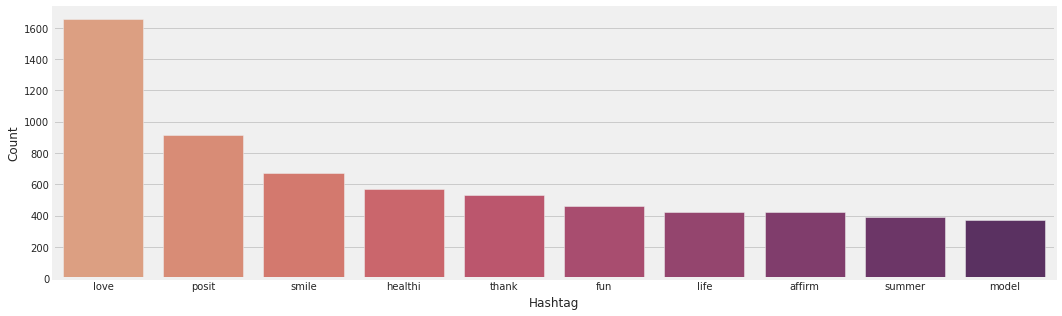

In [239]:
list_key = nltk.FreqDist(hashtag_positive)
df_hastag = pd.DataFrame({'Hashtag': list(list_key.keys()),
                  'Count': list(list_key.values())})
# selecting top 10 most frequent hashtags     
df_hastag = df_hastag.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))

ax = sns.barplot(data=df_hastag, x= "Hashtag", y = "Count",palette='flare')
ax.set(ylabel = 'Count')
plt.show()

In [344]:
#creating the new data frame with megative words and count of negative words
Df_positive=pd.DataFrame()
Df_positive['negative words'] = list(list_key.keys())
Df_positive['predicted values'] = list(list_key.values())
Df_positive


,negative words,predicted values
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


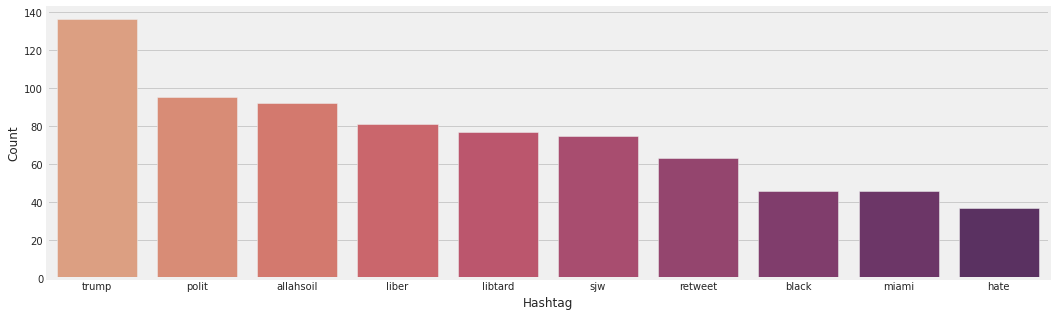

In [240]:
list_key_negative = nltk.FreqDist(hastag_negative)
df_hashtag_negative = pd.DataFrame({'Hashtag': list(list_key_negative.keys()), 'Count': list(list_key_negative.values())})
# selecting top 10 most frequent hashtags
df_hashtag_negative = df_hashtag_negative.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_hashtag_negative, x= "Hashtag", y = "Count",palette='flare')
ax.set(ylabel = 'Count')
plt.show()

In [343]:
#creating the new data frame with megative words and count of negative words
Df_negative=pd.DataFrame()
Df_negative['negative words'] = list(list_key_negative.keys())
Df_negative['predicted values'] = list(list_key_negative.values())
Df_negative


,negative words,predicted values
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf_vectorizer = vectorizer.fit_transform(merge_data['neat_tweet'])
tfidf_vectorizer

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log_reg = LogisticRegression()

ytrain, yvalid = train_test_split(df_train['label'], random_state=42, test_size=0.3)

train_tfidf_vectorizer = tfidf_vectorizer[:31962,:]
test_tfidf_vectorizer = tfidf_vectorizer[31962:,:]

xtrain_vectorizer_tfidf = train_tfidf_vectorizer[ytrain.index]
xvalid_vectorizer_tfidf = train_tfidf_vectorizer[yvalid.index]

log_reg.fit(xtrain_vectorizer_tfidf, ytrain)

predic = log_reg.predict_proba(xvalid_vectorizer_tfidf)
prediction = predic[:,1] >= 0.3
prediction = prediction.astype(np.int)

f1_score(yvalid, prediction)

0.5451327433628319

In [247]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.69      0.45      0.55       684

    accuracy                           0.95      9589
   macro avg       0.82      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589

